In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('IPL_2008-2020.csv')
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
df.shape


(816, 17)

Replacing the Nan Values

In [8]:
df.drop('method',axis=1,inplace=True)

In [9]:
df['winner'].fillna('No result',inplace = True)


In [10]:
df['result'].fillna('No result',inplace =True)

In [11]:
df['player_of_match'].fillna('No player',inplace = True)

In [12]:
df.isna().sum()

id                  0
city               13
date                0
player_of_match     0
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64

In [13]:
#checking the data types of columns
df.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
umpire1             object
umpire2             object
dtype: object

In [14]:
#counting the no.of cities
def cities():
  return df['city'].value_counts()
cities()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Sharjah            12
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cuttack             7
Cape Town           7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Names of cities where matches has been played')

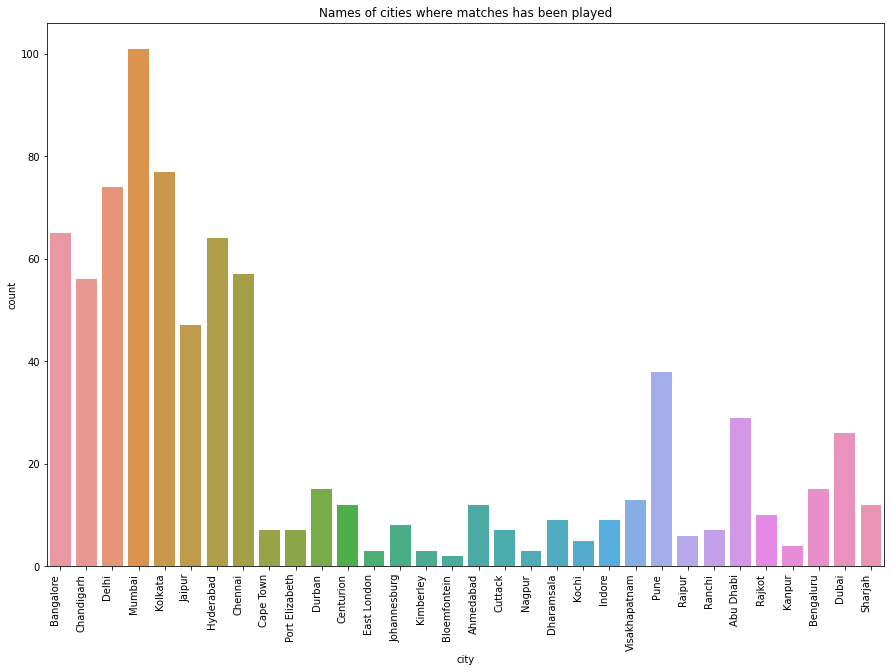

In [15]:
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(),rotation =90 ,ha='right')
fig =plt.gcf()
fig.set_size_inches(15,10)
plt.title('Names of cities where matches has been played')

Analysing the Venue column

In [16]:
#
def venue():
  return df['venue'].value_counts()
venue()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Maharashtra Cricket Association Stadium                 21
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Names of differnt Venues')

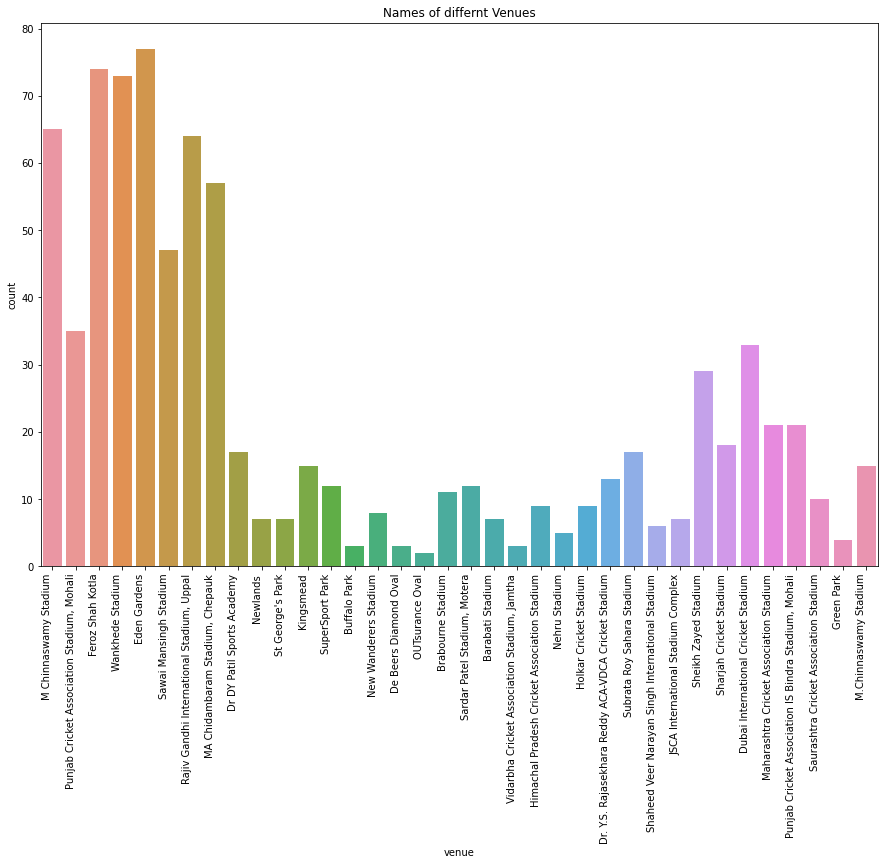

In [17]:
sns.countplot(df['venue'])
sns.countplot(df['venue']).set_xticklabels(sns.countplot(df['venue']).get_xticklabels(),rotation =90 ,ha='right')
fig =plt.gcf()
fig.set_size_inches(15,10)
plt.title('Names of differnt Venues')

In [18]:
mum_venue =df.loc[df['city']=='Mumbai','venue'].value_counts()
mum_venue

Wankhede Stadium              73
Dr DY Patil Sports Academy    17
Brabourne Stadium             11
Name: venue, dtype: int64

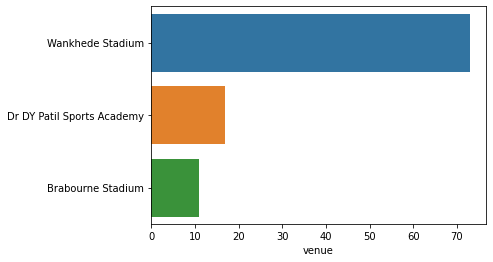

In [19]:
sns.barplot(x=mum_venue , y=mum_venue.index,)

Result of the matches at diferent Venues 

<Figure size 1800x1440 with 0 Axes>

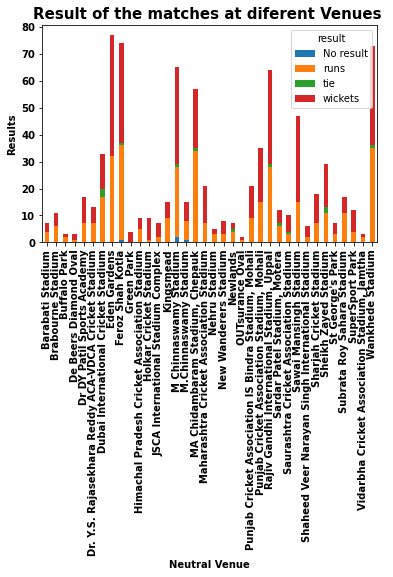

In [64]:
fig = plt.figure(figsize=(25,20))
type_plt=pd.crosstab(df['venue'],df['result'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Result of the matches at diferent Venues ',fontsize=15,fontweight='bold')
plt.ylabel('Results',fontsize=10,fontweight='bold')
plt.xlabel('Neutral Venue',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Analysing the 'Result' column

In [22]:
def win_byruns():
  return df.loc[df['result']=='runs','winner'].value_counts()
win_byruns()

Mumbai Indians                 62
Chennai Super Kings            53
Kolkata Knight Riders          41
Kings XI Punjab                40
Royal Challengers Bangalore    38
Sunrisers Hyderabad            34
Rajasthan Royals               28
Delhi Daredevils               25
Deccan Chargers                18
Delhi Capitals                  9
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

In [23]:
def win_bywkt():
  return df.loc[df['result']=='wickets','winner'].value_counts()
win_bywkt()

Kolkata Knight Riders          57
Mumbai Indians                 56
Chennai Super Kings            53
Rajasthan Royals               51
Royal Challengers Bangalore    51
Kings XI Punjab                45
Delhi Daredevils               42
Sunrisers Hyderabad            31
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  8
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [24]:
def tie():
  return df.loc[df['result']=='tie','winner'].value_counts()
tie()

Kings XI Punjab                3
Rajasthan Royals               2
Delhi Capitals                 2
Royal Challengers Bangalore    2
Mumbai Indians                 2
Kolkata Knight Riders          1
Sunrisers Hyderabad            1
Name: winner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Result of the matches')

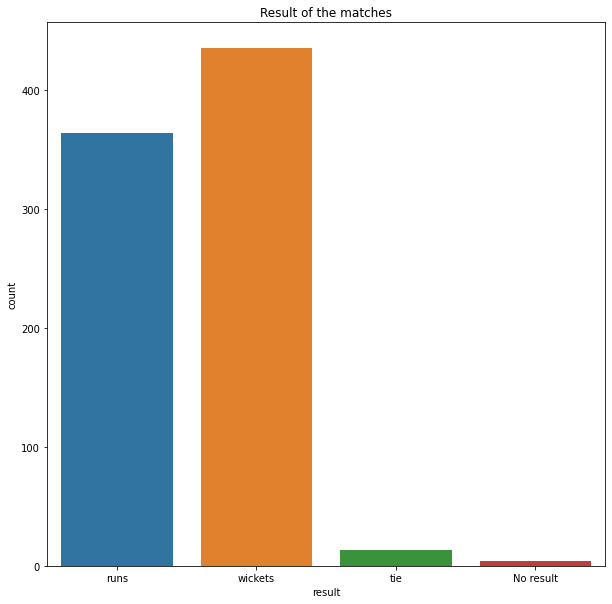

In [25]:
sns.countplot(df['result'])
fig =plt.gcf()
fig.set_size_inches(10,10)
plt.title('Result of the matches')

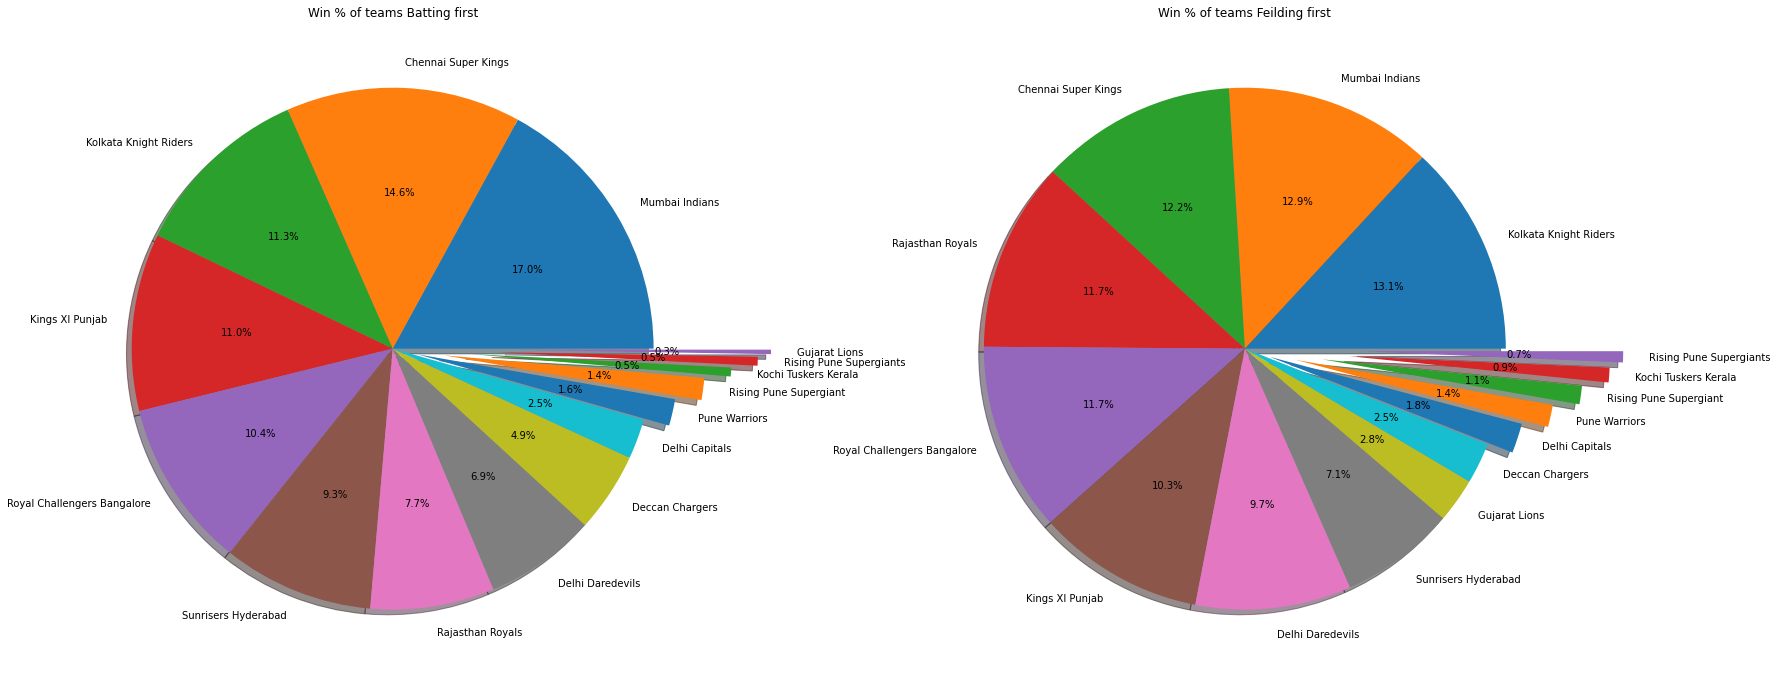

In [26]:
def win_by():
  label_bat_wins = np.array(win_byruns().index)
  label_field_wins = np.array(win_bywkt().index)
  explode_bat_wins = (0,0,0,0,0,0,0,0,0.0,0,0.1,0.2,0.3,0.4,0.45)
  explode_ball_wins = (0,0,0,0,0,0,0,0,0.0,0,0.1,0.2,0.3,0.4,0.45)
  fig,(ax1,ax2) =  plt.subplots(1,2,figsize=(28,12))
  ax1.pie(x=win_byruns(), autopct = '%1.1f%%',labels = label_bat_wins,explode = explode_bat_wins,shadow=True)
  ax1.set_title('Win % of teams Batting first')
  ax2.pie(x = win_bywkt() , autopct = '%1.1f%%',labels =label_field_wins,explode = explode_ball_wins,shadow=True)
  ax2.set_title('Win % of teams Feilding first')

win_by()

Analysing the 'toss winer' & 'toss decision' columns

In [27]:
# Teams with most toss win
def most_tosswin():
  return df['toss_winner'].value_counts()
most_tosswin()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

In [28]:
#Teams winning the toss and choosing to Bat first
df.loc[df['toss_decision'] == 'bat','toss_winner'].value_counts()

Chennai Super Kings            51
Mumbai Indians                 48
Kolkata Knight Riders          34
Rajasthan Royals               34
Delhi Daredevils               29
Kings XI Punjab                27
Deccan Chargers                24
Sunrisers Hyderabad            24
Royal Challengers Bangalore    24
Pune Warriors                  11
Delhi Capitals                  7
Rising Pune Supergiants         3
Kochi Tuskers Kerala            3
Gujarat Lions                   1
Name: toss_winner, dtype: int64

In [29]:
#Teams winning the toss and choosing to Feild first
df.loc[df['toss_decision'] == 'field','toss_winner'].value_counts()

Kolkata Knight Riders          64
Royal Challengers Bangalore    63
Mumbai Indians                 58
Kings XI Punjab                58
Rajasthan Royals               53
Delhi Daredevils               51
Chennai Super Kings            46
Sunrisers Hyderabad            33
Deccan Chargers                19
Gujarat Lions                  14
Delhi Capitals                 13
Pune Warriors                   9
Rising Pune Supergiant          6
Kochi Tuskers Kerala            5
Rising Pune Supergiants         4
Name: toss_winner, dtype: int64

<Figure size 1800x1440 with 0 Axes>

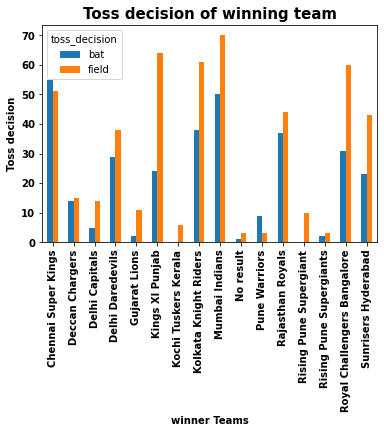

In [30]:
fig = plt.figure(figsize=(25,20))
type_plt=pd.crosstab(df['winner'],df['toss_decision'])
type_plt.plot(kind='bar',stacked=False);
plt.title('Toss decision of winning team',fontsize=15,fontweight='bold')
plt.xlabel('winner Teams',fontsize=10,fontweight='bold')
plt.ylabel('Toss decision',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

In [31]:
tos= df['toss_decision'].value_counts()
tos

field    496
bat      320
Name: toss_decision, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa1844ce390>,
 [Text(-0.3655903556118915, 1.0374698510721025, 'field'),
  Text(0.3655904527468272, -1.037469816843059, 'bat')],
 [Text(-0.1994129212428499, 0.5658926460393287, '60.8%'),
  Text(0.1994129742255421, -0.5658926273689412, '39.2%')])

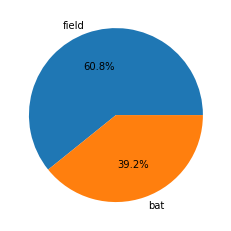

In [32]:
labels = np.array(tos.index)
size = (np.array((tos / tos.sum())*100))
plt.pie(size, labels =labels ,autopct= '%1.1f%%')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Teams choosing to Bat or field')

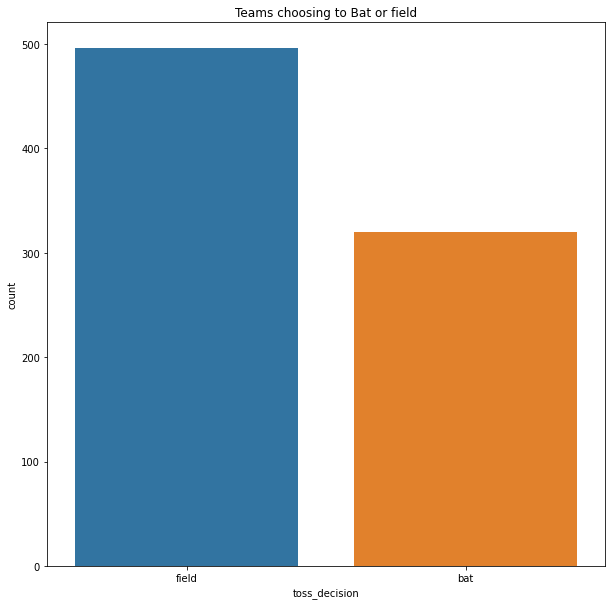

In [33]:
sns.countplot(df['toss_decision'])
fig =plt.gcf()
fig.set_size_inches(10,10)
plt.title('Teams choosing to Bat or field')

<Figure size 1800x1440 with 0 Axes>

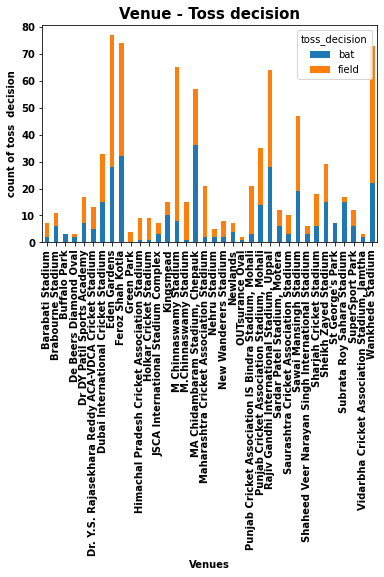

In [34]:
# Toss decision at different Venues
fig = plt.figure(figsize=(25,20))
type_plt=pd.crosstab(df['venue'],df['toss_decision'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Venue - Toss decision',fontsize=15,fontweight='bold')
plt.ylabel('count of toss  decision',fontsize=10,fontweight='bold')
plt.xlabel('Venues',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

In [35]:
#Teams winning the toss and choosing to Bat first and winning the match
bat = df.loc[df['toss_decision']=='bat','winner'].value_counts()
bat

Chennai Super Kings            55
Mumbai Indians                 50
Kolkata Knight Riders          38
Rajasthan Royals               37
Royal Challengers Bangalore    31
Delhi Daredevils               29
Kings XI Punjab                24
Sunrisers Hyderabad            23
Deccan Chargers                14
Pune Warriors                   9
Delhi Capitals                  5
Rising Pune Supergiants         2
Gujarat Lions                   2
No result                       1
Name: winner, dtype: int64

In [36]:
#Teams winning the toss and choosing to field first and winning the match
ball = df.loc[df['toss_decision']=='field','winner'].value_counts()
ball

Mumbai Indians                 70
Kings XI Punjab                64
Kolkata Knight Riders          61
Royal Challengers Bangalore    60
Chennai Super Kings            51
Rajasthan Royals               44
Sunrisers Hyderabad            43
Delhi Daredevils               38
Deccan Chargers                15
Delhi Capitals                 14
Gujarat Lions                  11
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
No result                       3
Rising Pune Supergiants         3
Pune Warriors                   3
Name: winner, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa1859d0bd0>,
 [Text(0.36559025847695215, 1.0374698853011377, 'Batting First'),
  Text(-0.3655901613420098, -1.0374699195301633, 'Feilding First')],
 [Text(0.1994128682601557, 0.5658926647097113, '39.2%'),
  Text(-0.19941281527745988, -0.565892683380089, '60.8%')])

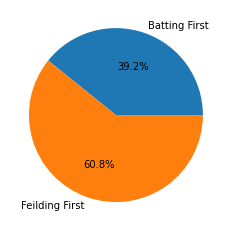

In [37]:
bat_total = df.loc[df['toss_decision']=='bat','winner'].value_counts().sum()
ball_total = df.loc[df['toss_decision']=='field','winner'].value_counts().sum()
labels = 'Batting First','Feilding First'
sizes = [bat_total,ball_total]
plt.pie(sizes,labels=labels ,autopct='%1.1f%%')

In [38]:
# labels = np.array(ball.index)
# size = (np.array((ball / ball.sum())*100))
# explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.3,0.5,0.7,0.9,0)
# fig = plt.figure(figsize=(10,8))
# plt.pie(size ,explode=explode, labels=labels,autopct= '%1.1f%%',shadow=True, startangle=90) 


# labels = np.array(bat.index)
# size = (np.array((bat / bat.sum())*100))
# explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.5,0.8,0.9)
# fig = plt.figure(figsize=(10,8))
# plt.pie(size ,explode=explode, labels=labels,autopct= '%1.1f%%',shadow=True, startangle=90) 

OR You Can generate pie IN THIS WAY TOO:

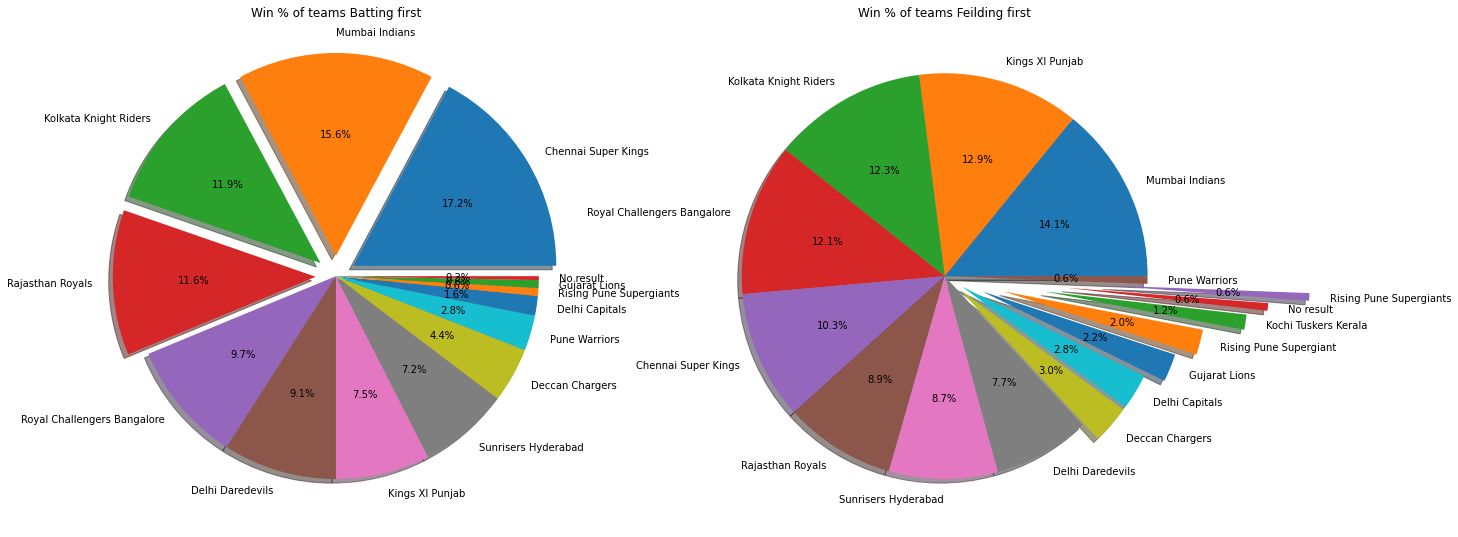

In [66]:
def bat_or_field():
  label_bat = np.array(bat.index)
  label_ball = np.array(ball.index)
  explode_bat = (0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0)
  explode_ball = (0,0,0,0,0,0,0,0,0.1,0.1,0.2,0.3,0.5,0.6,0.8,0)
  fig,(ax1,ax2) =  plt.subplots(1,2,figsize=(20,15))
  ax1.pie(x=bat, autopct = '%1.1f%%',labels = label_bat,explode = explode_bat,shadow=True)
  ax1.set_title('Win % of teams Batting first')
  ax2.pie(x = ball , autopct = '%1.1f%%',labels =label_ball,explode = explode_ball,shadow=True)
  ax2.set_title('Win % of teams Feilding first')

bat_or_field()

<Figure size 1800x1440 with 0 Axes>

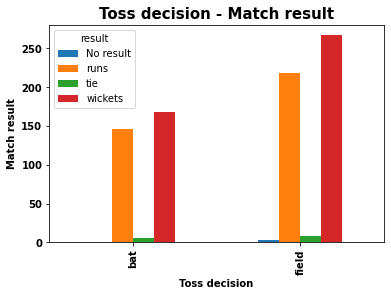

In [40]:
fig = plt.figure(figsize=(25,20))
type_plt=pd.crosstab(df['toss_decision'],df['result'])
type_plt.plot(kind='bar',stacked=False);
plt.title('Toss decision - Match result',fontsize=15,fontweight='bold')
plt.ylabel('Match result',fontsize=10,fontweight='bold')
plt.xlabel('Toss decision',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

**Analysing the 'winner', 'result', 'result margin' columns**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Winners')

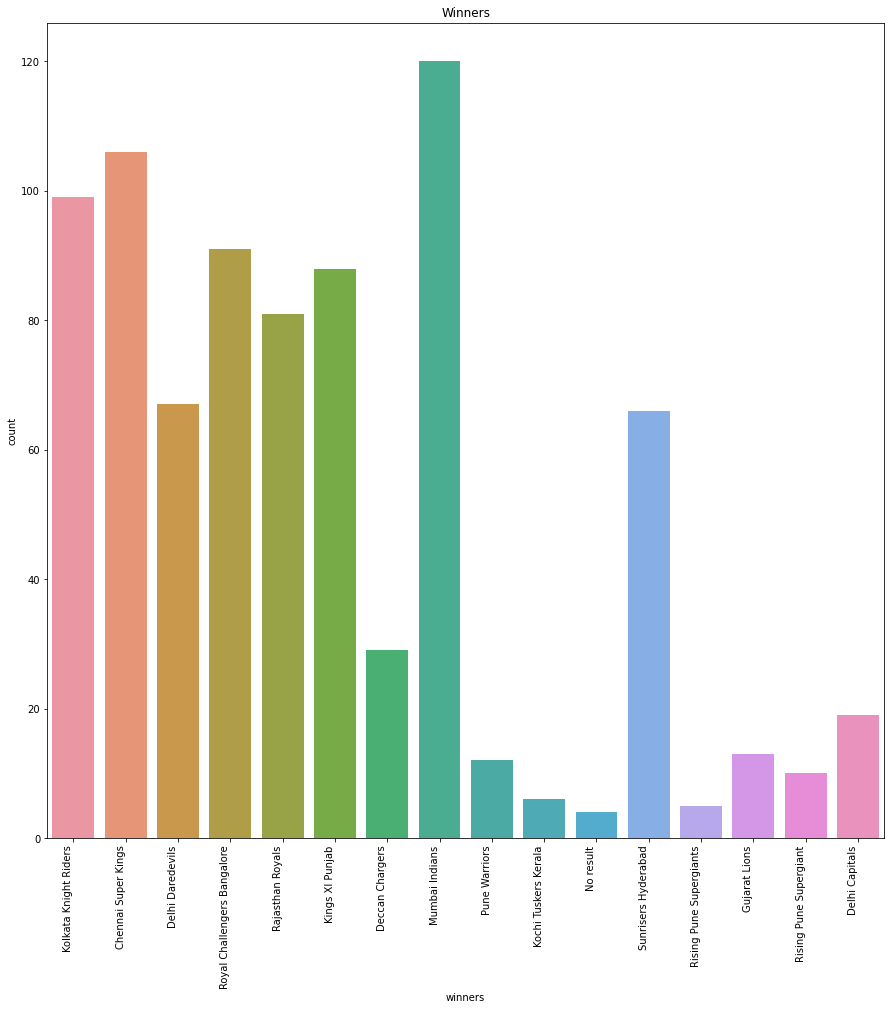

In [41]:
most_wins= pd.DataFrame({'winners':df['winner']})
sns.countplot(most_wins['winners'])
sns.countplot(most_wins['winners']).set_xticklabels(sns.countplot(most_wins['winners']).get_xticklabels(),rotation=90,ha='right')
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Winners')

Teams winning the match by 10 wickets

In [42]:
df.loc[(df['result_margin'] == 10) & (df['result'] == 'wickets') , ['date' ,'winner']].sort_values(by= 'date',ascending = True)

,date,winner
12,2008-04-27,Deccan Chargers
60,2009-04-19,Delhi Daredevils
124,2010-03-18,Royal Challengers Bangalore
239,2011-05-20,Rajasthan Royals
317,2012-05-20,Mumbai Indians
331,2013-04-10,Chennai Super Kings
483,2015-04-26,Royal Challengers Bangalore
531,2016-04-21,Sunrisers Hyderabad
579,2017-04-07,Kolkata Knight Riders
611,2017-04-30,Kings XI Punjab


In [43]:
win_by_10wkts=df.loc[(df['result_margin'] == 10) & (df['result'] == 'wickets') , ['winner']].value_counts()
win_by_10wkts

winner                     
Royal Challengers Bangalore    3
Sunrisers Hyderabad            2
Mumbai Indians                 2
Chennai Super Kings            2
Rajasthan Royals               1
Kolkata Knight Riders          1
Kings XI Punjab                1
Delhi Daredevils               1
Deccan Chargers                1
dtype: int64

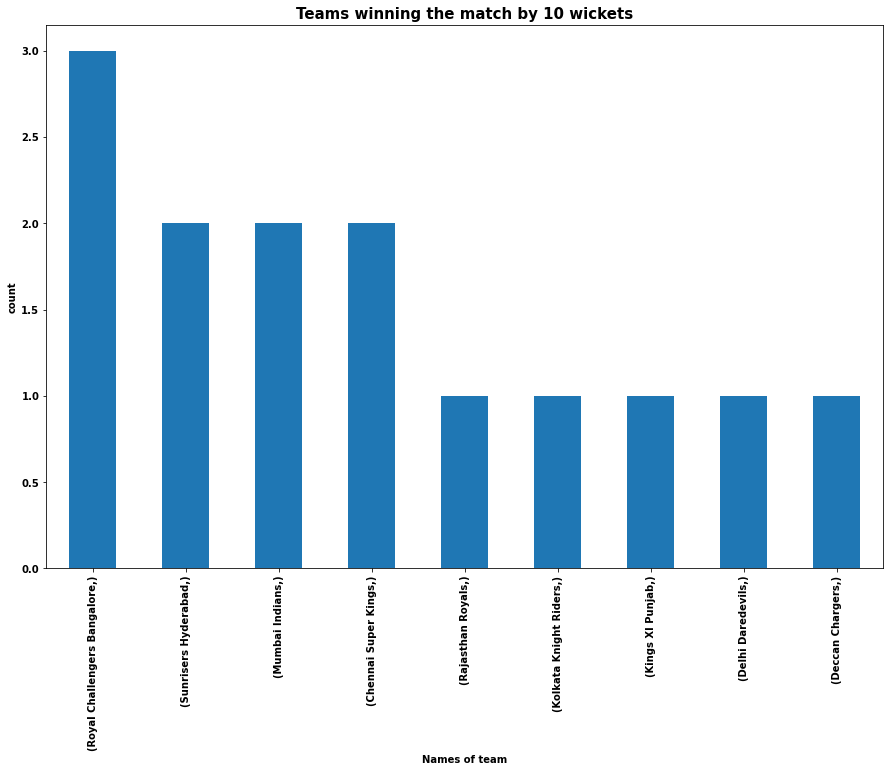

In [44]:
fig = plt.figure(figsize=(15,10))
win_by_10wkts.plot(kind='bar',stacked=True);
plt.title('Teams winning the match by 10 wickets',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=10,fontweight='bold')
plt.xlabel('Names of team',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Teams winnning the match with big runs margin

In [45]:
big_runs_win=df.loc[(df['result_margin'].between(75,150)) & (df['result'] == 'runs') , ['result_margin','winner']].sort_values(by='result_margin' ,ascending= False)
big_runs_win.head()


,result_margin,winner
620,146.0,Mumbai Indians
560,144.0,Royal Challengers Bangalore
0,140.0,Kolkata Knight Riders
497,138.0,Royal Challengers Bangalore
351,130.0,Royal Challengers Bangalore


In [46]:
big_runs_wincount=df.loc[(df['result_margin'].between(75,150)) & (df['result'] == 'runs') , ['winner']].value_counts()
big_runs_wincount


winner                     
Chennai Super Kings            8
Royal Challengers Bangalore    7
Mumbai Indians                 5
Sunrisers Hyderabad            3
Rajasthan Royals               3
Kings XI Punjab                3
Kolkata Knight Riders          2
Delhi Daredevils               1
Deccan Chargers                1
dtype: int64

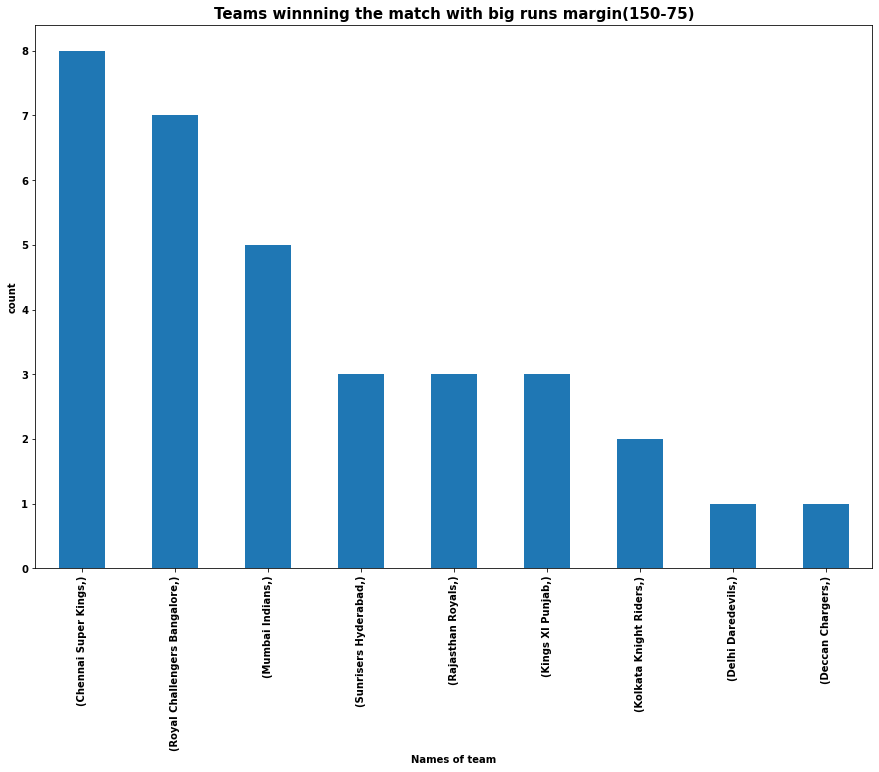

In [47]:
fig = plt.figure(figsize=(15,10))
big_runs_wincount.plot(kind='bar');
plt.title('Teams winnning the match with big runs margin(150-75)',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=10,fontweight='bold')
plt.xlabel('Names of team',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'Biggest win in terms of wickets')

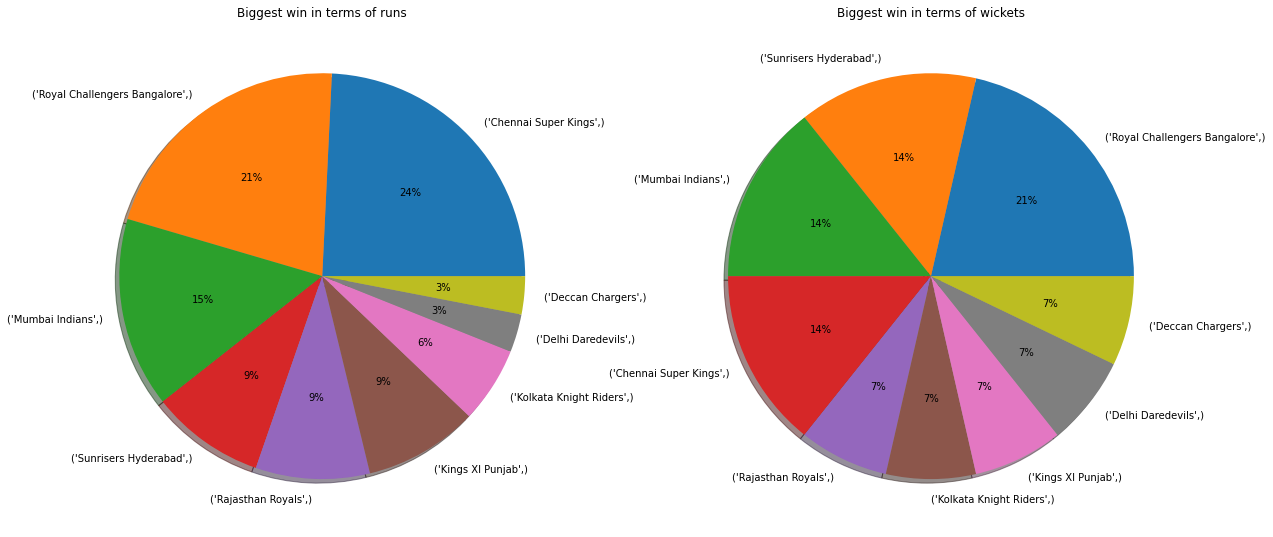

In [48]:
label1 = np.array(big_runs_wincount.index)
label2 = np.array(win_by_10wkts.index)
# explode_bat = (0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0)
# explode_ball = (0,0,0,0,0,0,0,0,0.1,0.1,0.2,0.3,0.5,0.6,0.8)
fig,(ax1,ax2) =  plt.subplots(1,2,figsize=(20,10))
ax1.pie(x=big_runs_wincount, autopct = '%1.f%%',labels = label1,shadow=True)
ax1.set_title('Biggest win in terms of runs')
ax2.pie(x = win_by_10wkts , autopct = '%1.f%%',labels =label2,shadow=True)
ax2.set_title('Biggest win in terms of wickets')


Eliminator analysis

In [49]:
elm_wins = df.loc[df['eliminator'] == 'Y','winner'].value_counts()
elm_wins

Kings XI Punjab                3
Rajasthan Royals               2
Delhi Capitals                 2
Royal Challengers Bangalore    2
Mumbai Indians                 2
Kolkata Knight Riders          1
Sunrisers Hyderabad            1
Name: winner, dtype: int64

In [50]:
elm_loss = df.loc[df['eliminator'] == 'N','winner'].value_counts()
elm_loss

Mumbai Indians                 118
Chennai Super Kings            106
Kolkata Knight Riders           98
Royal Challengers Bangalore     89
Kings XI Punjab                 85
Rajasthan Royals                79
Delhi Daredevils                67
Sunrisers Hyderabad             65
Deccan Chargers                 29
Delhi Capitals                  17
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

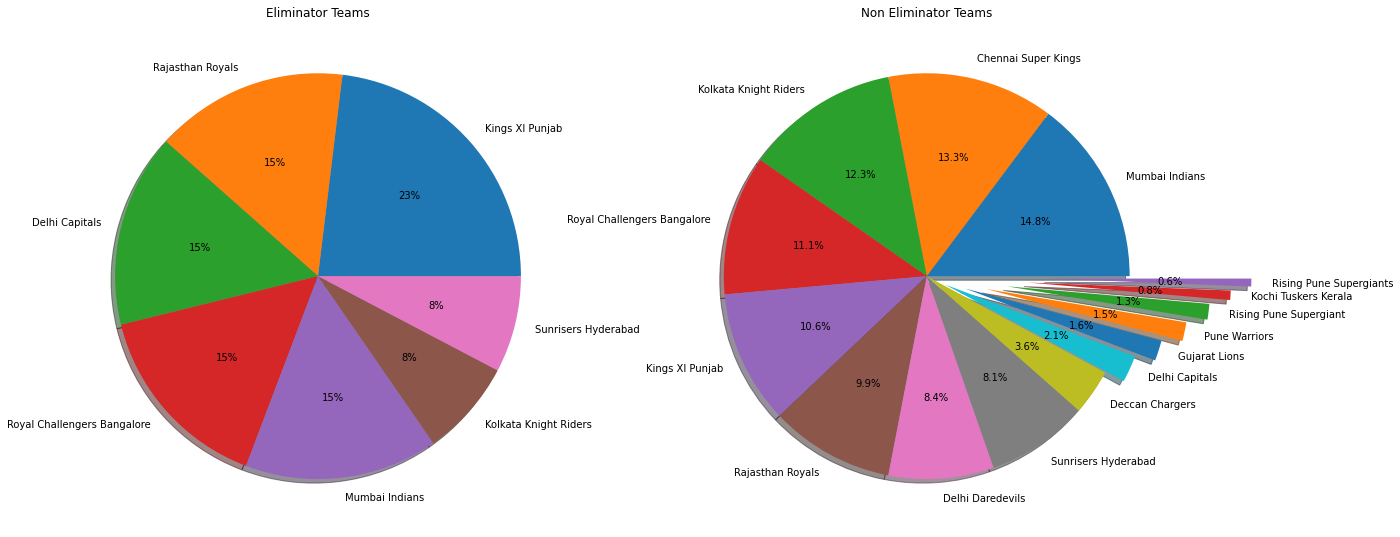

In [51]:
def eleminator_count():
  label_elm_win = np.array(elm_wins.index)
  label_elm_loss = np.array(elm_loss.index)
 
  explode_elm_loss = (0,0,0,0,0,0,0,0,0,0.1,0.2,0.3,0.4,0.5,0.6)
  fig,(ax1,ax2) =  plt.subplots(1,2,figsize=(20,10))
  ax1.pie(x=elm_wins, autopct = '%1.f%%',labels = label_elm_win,shadow=True)
  ax1.set_title('Eliminator Teams')
  ax2.pie(x = elm_loss , autopct = '%1.1f%%',labels =label_elm_loss,explode = explode_elm_loss,shadow=True)
  ax2.set_title('Non Eliminator Teams')
eleminator_count()

Neutral Venue Analysis

In [52]:
NVW = df.loc[df['neutral_venue']==1 ,['winner']].value_counts()
NVW

winner                     
Kings XI Punjab                12
Delhi Daredevils               12
Chennai Super Kings            12
Royal Challengers Bangalore    11
Rajasthan Royals                9
Deccan Chargers                 9
Mumbai Indians                  5
Kolkata Knight Riders           5
Sunrisers Hyderabad             2
dtype: int64

<Figure size 1800x1440 with 0 Axes>

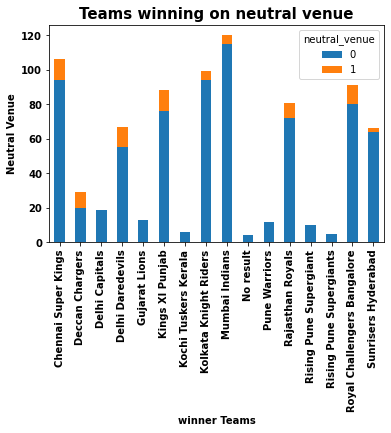

In [53]:
fig = plt.figure(figsize=(25,20))
type_plt=pd.crosstab(df['winner'],df['neutral_venue'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Teams winning on neutral venue',fontsize=15,fontweight='bold')
plt.xlabel('winner Teams',fontsize=10,fontweight='bold')
plt.ylabel('Neutral Venue',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

([<matplotlib.patches.Wedge at 0x7fa1842521d0>,
 [Text(0.9707737407549583, 0.5172990858880628, "('Kings XI Punjab',)"),
  Text(0.11200532529141956, 1.0942827820569798, "('Delhi Daredevils',)"),
  Text(-0.8458455351187524, 0.7032391703536369, "('Chennai Super Kings',)"),
  Text(-1.067204565232643, -0.266597854354842, "('Royal Challengers Bangalore',)"),
  Text(-0.5369938669255959, -0.9600195763026373, "('Rajasthan Royals',)"),
  Text(0.24477296280441316, -1.0724207181325571, "('Deccan Chargers',)"),
  Text(0.8571387583569452, -0.8398292379539511, "('Mumbai Indians',)"),
  Text(1.1200037989225107, -0.43080330824999985, "('Kolkata Knight Riders',)"),
  Text(1.1960070932768758, -0.0978112101520003, "('Sunrisers Hyderabad',)")],
 [Text(0.5295129495027044, 0.28216313775712515, '16%'),
  Text(0.06109381379531975, 0.5968815174856252, '16%'),
  Text(-0.4613702918829558, 0.38358500201107465, '16%'),
  Text(-0.582111581035987, -0.14541701146627745, '14%'),
  Text(-0.2929057455957796, -0.523647041

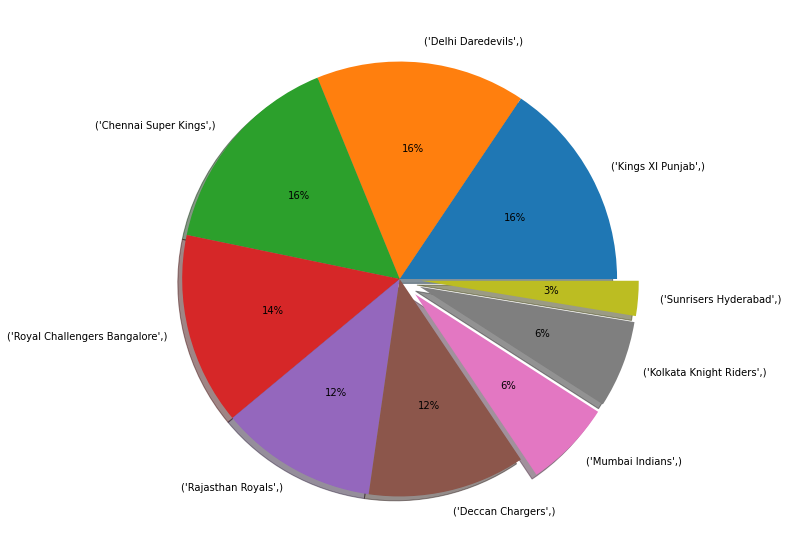

In [54]:
label_nvw = np.array(NVW.index)
explode = [0,0,0,0,0,0,0.1,0.1,0.1]
plt.figure(figsize=[15,10])
plt.pie(NVW,labels = label_nvw,autopct = '%1.f%%', shadow=True,explode=explode)

In [55]:
df.loc[(df['neutral_venue']==1) ,['venue']].value_counts()

venue                              
Kingsmead                              15
SuperSport Park                        12
New Wanderers Stadium                   8
St George's Park                        7
Sheikh Zayed Stadium                    7
Newlands                                7
Dubai International Cricket Stadium     7
Sharjah Cricket Stadium                 6
De Beers Diamond Oval                   3
Buffalo Park                            3
OUTsurance Oval                         2
dtype: int64

<Figure size 1800x1440 with 0 Axes>

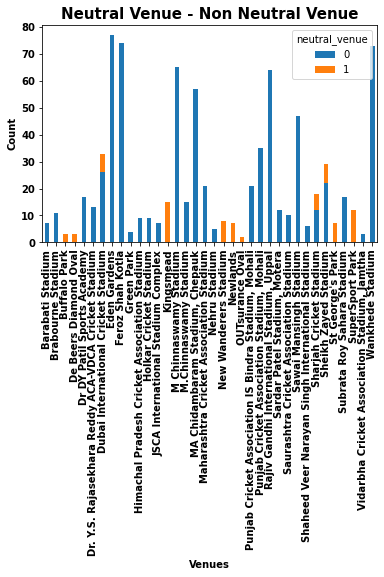

In [56]:
fig = plt.figure(figsize=(25,20))
type_plt=pd.crosstab(df['venue'],df['neutral_venue'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Neutral Venue - Non Neutral Venue',fontsize=15,fontweight='bold')
plt.xlabel('Venues',fontsize=10,fontweight='bold')
plt.ylabel('Count',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Most player of the match Award

In [57]:
MOM = df['player_of_match'].value_counts()[:15]
MOM

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
DR Smith          11
KA Pollard        11
AD Russell        11
Name: player_of_match, dtype: int64

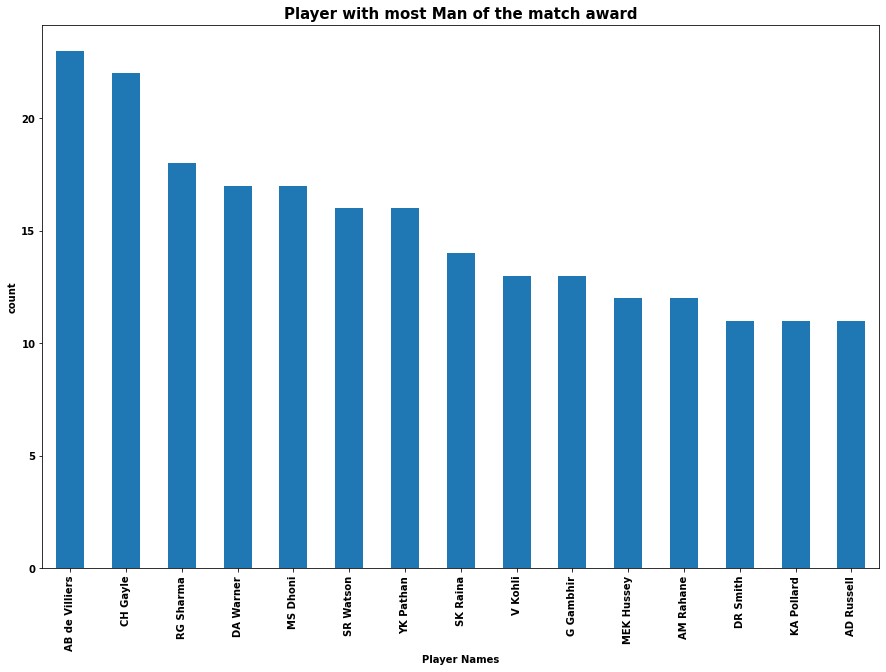

In [58]:
fig = plt.figure(figsize=(15,10))
MOM.plot(kind='bar',stacked=True);
plt.title('Player with most Man of the match award',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=10,fontweight='bold')
plt.xlabel('Player Names',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

# Mumbai Indians Analysis

(('Number of time MI won the toss is :', 106),
 'Mumbai Indians won mostly by : Runs: 62 , wicktes: 56, tie: 2 ',
 field    58
 bat      48
 Name: toss_decision, dtype: int64,
 ('MI most wins according to stadium: ',
  venue                                               
  Wankhede Stadium                                        42
  Eden Gardens                                            10
  M Chinnaswamy Stadium                                    8
  Rajiv Gandhi International Stadium, Uppal                7
  Brabourne Stadium                                        6
  Sheikh Zayed Stadium                                     6
  Dr DY Patil Sports Academy                               5
  MA Chidambaram Stadium, Chepauk                          5
  Feroz Shah Kotla                                         4
  Punjab Cricket Association Stadium, Mohali               3
  Dubai International Cricket Stadium                      3
  Sharjah Cricket Stadium                                

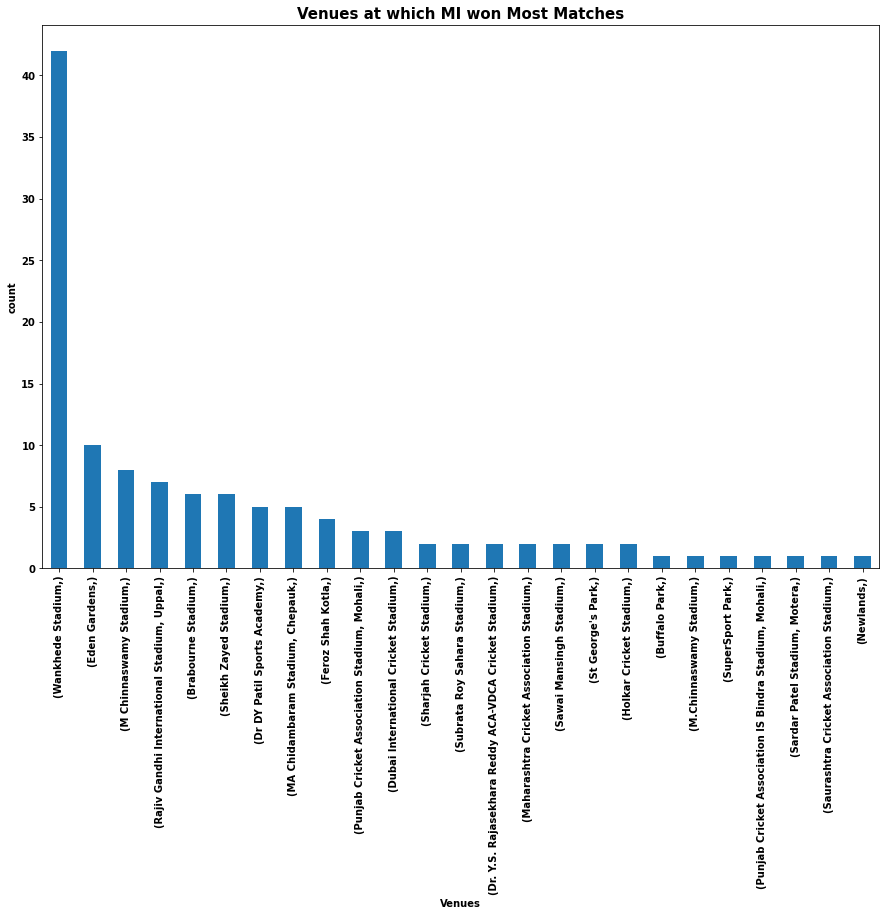

In [59]:
def winning_score():
  return ("Mumbai Indians won mostly by : Runs: {} , wicktes: {}, tie: {} ").format(win_byruns()['Mumbai Indians'] , win_bywkt()['Mumbai Indians'],tie()['Mumbai Indians'])


def toss_decision_by_mi():
  return df.loc[df['toss_winner'] == 'Mumbai Indians','toss_decision'].value_counts()

def times_winning_the_toss():
  return ("Number of time MI won the toss is :", most_tosswin()['Mumbai Indians'])



def venue_mi():
  venue_mi = df.loc[df['winner'] == 'Mumbai Indians' ,['venue']].value_counts()
  
  return ('MI most wins according to stadium: ',venue_mi)


def most_mom_MI():
  mom_MI = df.loc[df['winner'] == 'Mumbai Indians' ,'player_of_match'].value_counts().idxmax()
  return ('{} has got most Player Of the Match award For MI').format(mom_MI)



venue_mi_plot = df.loc[df['winner'] == 'Mumbai Indians' ,['venue']].value_counts()
fig = plt.figure(figsize=(15,10))
venue_mi_plot.plot(kind ='bar')
plt.title('Venues at which MI won Most Matches',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=10,fontweight='bold')
plt.xlabel('Venues',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');


def all(): 
  return times_winning_the_toss(),winning_score(),toss_decision_by_mi(),venue_mi(),most_mom_MI()
all()



# Chennai Super Kings

(('Number of time CSK won the toss is :', 97),
 'Chennai Super Kings won mostly by : Runs: 53 , wicktes: 53',
 bat      51
 field    46
 Name: toss_decision, dtype: int64,
 ('csk most wins according to stadium: ',
  venue                                              
  MA Chidambaram Stadium, Chepauk                        40
  Wankhede Stadium                                        7
  Dubai International Cricket Stadium                     6
  Feroz Shah Kotla                                        6
  Eden Gardens                                            5
  Maharashtra Cricket Association Stadium                 5
  M Chinnaswamy Stadium                                   4
  Sheikh Zayed Stadium                                    3
  Sawai Mansingh Stadium                                  3
  Rajiv Gandhi International Stadium, Uppal               3
  Punjab Cricket Association Stadium, Mohali              3
  JSCA International Stadium Complex                      3
  Dr DY Pati

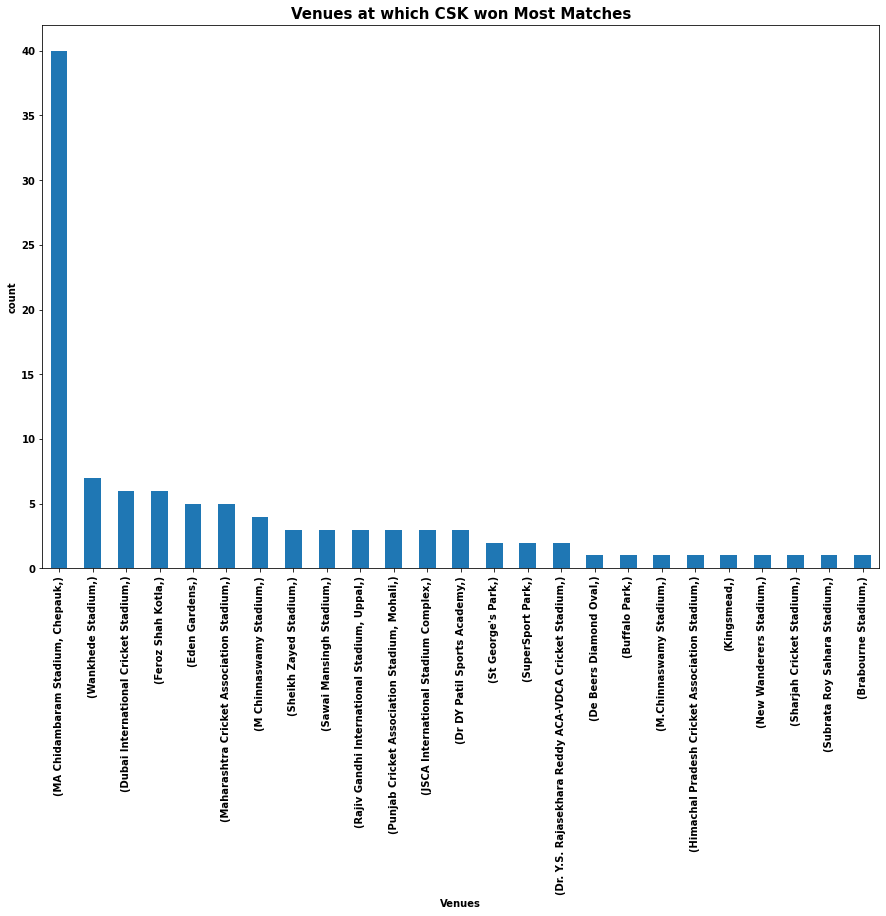

In [60]:
def winning_score():
  return ("Chennai Super Kings won mostly by : Runs: {} , wicktes: {}").format(win_byruns()['Chennai Super Kings'] , win_bywkt()['Chennai Super Kings'])


def toss_decision_by_csk():
  return df.loc[df['toss_winner'] == 'Chennai Super Kings','toss_decision'].value_counts()

def times_winning_the_toss():
  return ("Number of time CSK won the toss is :", most_tosswin()['Chennai Super Kings'])



def venue_csk():
  venue_mi = df.loc[df['winner'] == 'Chennai Super Kings' ,['venue']].value_counts()
  
  return ('csk most wins according to stadium: ',venue_mi)

def most_mom_csk():
  mom_csk = df.loc[df['winner'] == 'Chennai Super Kings' ,'player_of_match'].value_counts().idxmax()
  return ('{} has got most Player Of the Match award For CSK').format(mom_csk)


venue_csk_plot = df.loc[df['winner'] == 'Chennai Super Kings' ,['venue']].value_counts()
fig = plt.figure(figsize=(15,10))
venue_csk_plot.plot(kind ='bar')
plt.title('Venues at which CSK won Most Matches',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=10,fontweight='bold')
plt.xlabel('Venues',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');


def all(): 
  return times_winning_the_toss(),winning_score(),toss_decision_by_csk(),venue_csk(),most_mom_csk()
all()



#Royal Challengers Banglore

(('Number of time RCB won the toss is :', 87),
 'Royal Challengers Bangalore won mostly by : Runs: 38 , wicktes: 51, tie: 2 ',
 field    63
 bat      24
 Name: toss_decision, dtype: int64,
 ('RCB most wins according to stadium: ',
  venue                                               
  M Chinnaswamy Stadium                                   29
  M.Chinnaswamy Stadium                                    8
  Feroz Shah Kotla                                         6
  Dubai International Cricket Stadium                      5
  Eden Gardens                                             4
  Wankhede Stadium                                         3
  Kingsmead                                                3
  New Wanderers Stadium                                    3
  Sawai Mansingh Stadium                                   3
  Punjab Cricket Association Stadium, Mohali               2
  Punjab Cricket Association IS Bindra Stadium, Mohali     2
  SuperSport Park                          

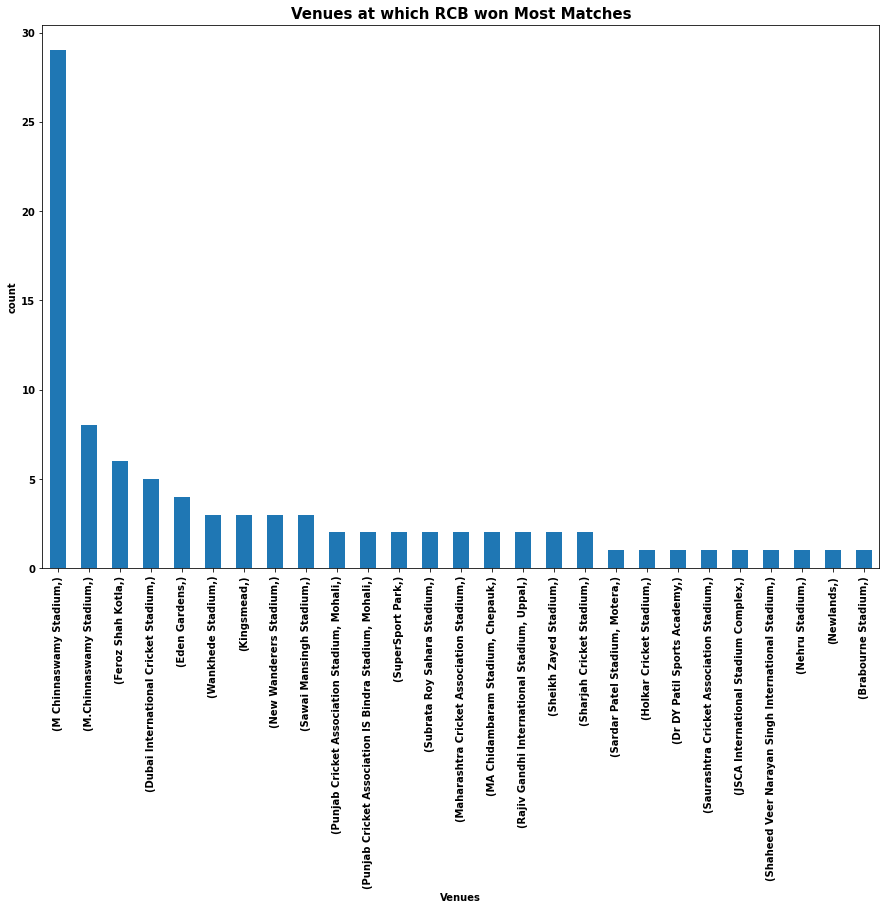

In [61]:
def winning_score():
  return ("Royal Challengers Bangalore won mostly by : Runs: {} , wicktes: {}, tie: {} ").format(win_byruns()['Royal Challengers Bangalore'] , win_bywkt()['Royal Challengers Bangalore'],tie()['Royal Challengers Bangalore'])


def toss_decision_by_RCB():
  return df.loc[df['toss_winner'] == 'Royal Challengers Bangalore','toss_decision'].value_counts()

def times_winning_the_toss():
  return ("Number of time RCB won the toss is :", most_tosswin()['Royal Challengers Bangalore'])



def venue_RCB():
  venue_RCB = df.loc[df['winner'] == 'Royal Challengers Bangalore' ,['venue']].value_counts()
  
  return ('RCB most wins according to stadium: ',venue_RCB)


def neutral_venue_rcb():
  neutral_rcb = df.loc[(df['neutral_venue']==1) & (df['winner']=='Royal Challengers Bangalore'),'venue'].value_counts().sum()
  return ("Rcb has won {} matches on neutral venue ").format(neutral_rcb)

venue_RCB_plot = df.loc[df['winner'] == 'Royal Challengers Bangalore' ,['venue']].value_counts()
fig = plt.figure(figsize=(15,10))
venue_RCB_plot.plot(kind ='bar')
plt.title('Venues at which RCB won Most Matches',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=10,fontweight='bold')
plt.xlabel('Venues',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');


def most_mom_rcb():
  mom_rcb = df.loc[df['winner'] == 'Royal Challengers Bangalore' ,'player_of_match'].value_counts().idxmax()
  return ('{} has got most Player Of the Match award For RCB').format(mom_rcb)


def all(): 
  return times_winning_the_toss(),winning_score(),toss_decision_by_RCB(),venue_RCB(),neutral_venue_rcb(),most_mom_rcb()
all()



#kolkata knight Riders

(('Number of time KKR won the toss is :', 98),
 'Kolkata Knight Riders won mostly by : Runs: 41 , wicktes: 57, tie: 1 ',
 field    64
 bat      34
 Name: toss_decision, dtype: int64,
 ('KKR most wins according to stadium: ',
  venue                                               
  Eden Gardens                                            45
  M Chinnaswamy Stadium                                    6
  Sheikh Zayed Stadium                                     6
  Rajiv Gandhi International Stadium, Uppal                5
  Feroz Shah Kotla                                         5
  Barabati Stadium                                         3
  Subrata Roy Sahara Stadium                               3
  Sawai Mansingh Stadium                                   3
  Maharashtra Cricket Association Stadium                  3
  Dr DY Patil Sports Academy                               2
  Dubai International Cricket Stadium                      2
  Kingsmead                                      

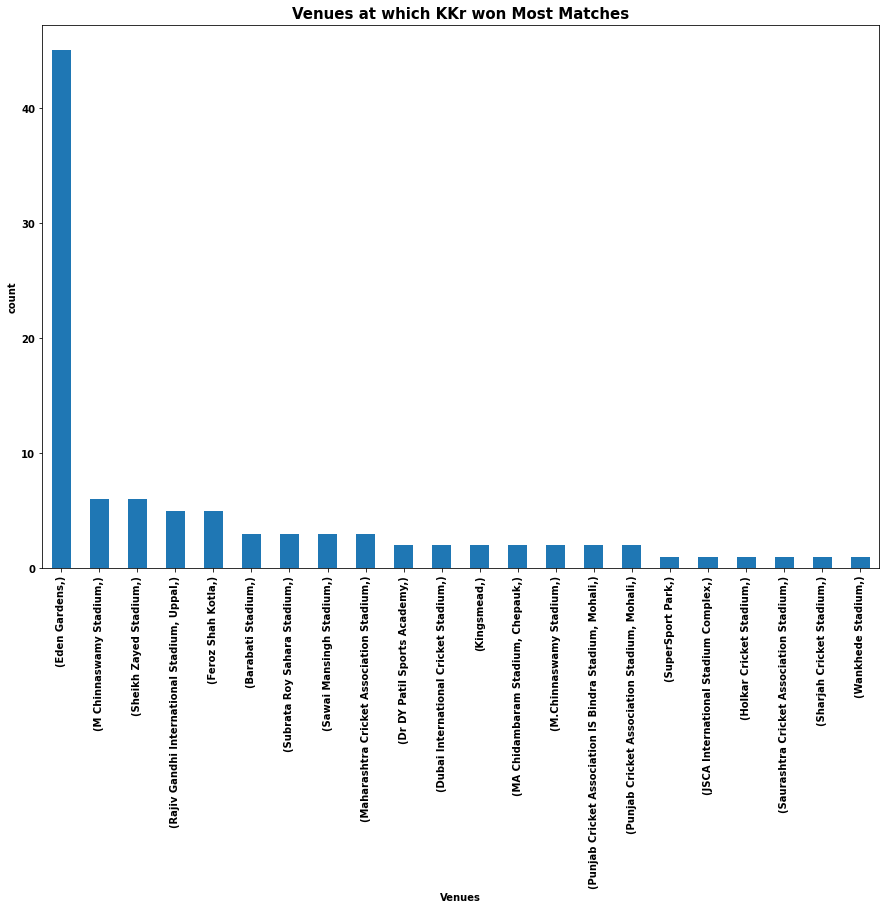

In [62]:
def winning_score():
  return ("Kolkata Knight Riders won mostly by : Runs: {} , wicktes: {}, tie: {} ").format(win_byruns()['Kolkata Knight Riders'] , win_bywkt()['Kolkata Knight Riders'],tie()['Kolkata Knight Riders'])


def toss_decision_by_KKR():
  return df.loc[df['toss_winner'] == 'Kolkata Knight Riders','toss_decision'].value_counts()

def times_winning_the_toss():
  return ("Number of time KKR won the toss is :", most_tosswin()['Kolkata Knight Riders'])



def venue_KKR():
  venue_KKR = df.loc[df['winner'] == 'Kolkata Knight Riders' ,['venue']].value_counts()
  
  return ('KKR most wins according to stadium: ',venue_KKR)


def most_mom_kkr():
  mom_kkr = df.loc[df['winner'] == 'Kolkata Knight Riders' ,'player_of_match'].value_counts().idxmax()
  return ('{} has got most Player Of the Match award For kkr').format(mom_kkr)


venue_KKR_plot = df.loc[df['winner'] == 'Kolkata Knight Riders' ,['venue']].value_counts()
fig = plt.figure(figsize=(15,10))
venue_KKR_plot.plot(kind ='bar')
plt.title('Venues at which KKr won Most Matches',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=10,fontweight='bold')
plt.xlabel('Venues',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');


def all(): 
  return times_winning_the_toss(),winning_score(),toss_decision_by_KKR(),venue_KKR(),most_mom_kkr()
all()

